In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_03_T1106_ABALONE_15kV_SiPM2_32V_LED400V.dat Number of events 595349.0
Total events number: 595349
event n. 0 time to process: 0.02
event n. 100000 time to process: 13.70
event n. 200000 time to process: 27.86
event n. 300000 time to process: 41.02
event n. 400000 time to process: 54.71
event n. 500000 time to process: 67.72


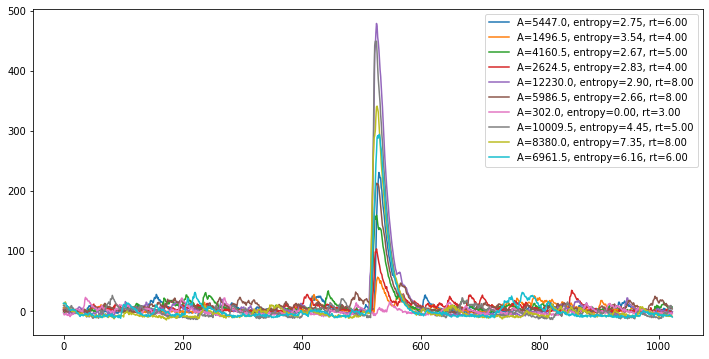

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_03_T1106_ABALONE_15kV_SiPM2_32V_LED400V.dat'
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,w=10)

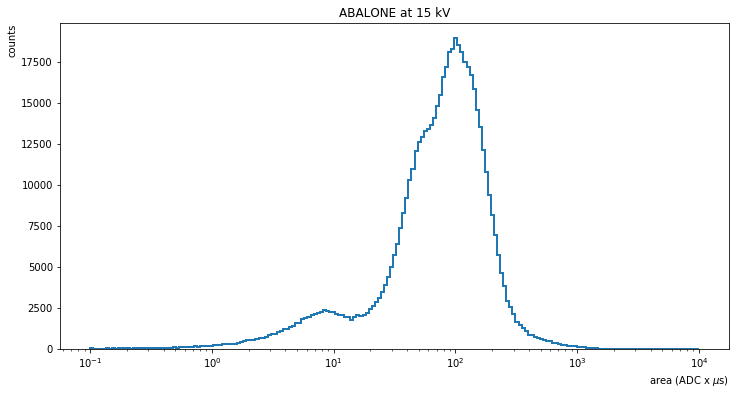

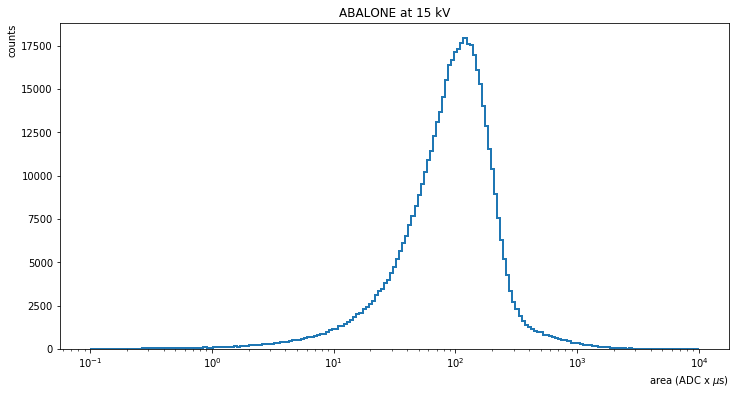

<Figure size 864x432 with 0 Axes>

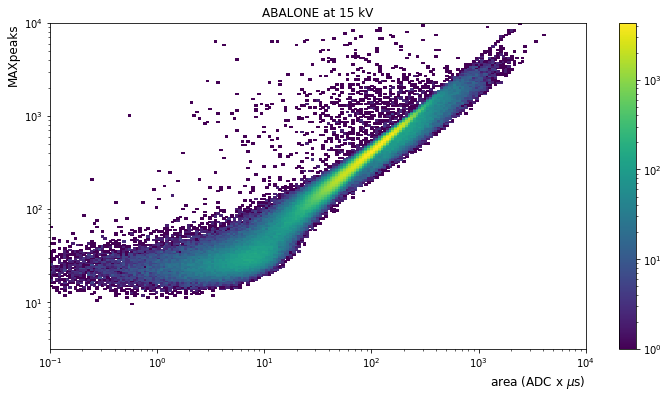

<Figure size 864x432 with 0 Axes>

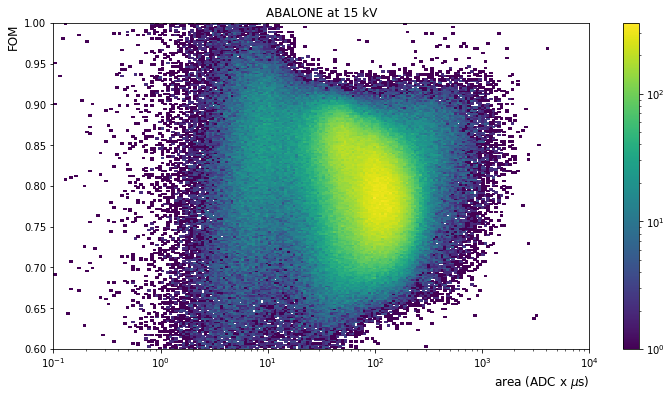

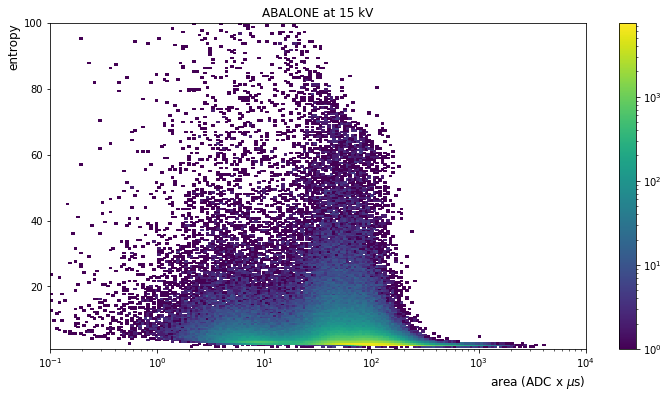

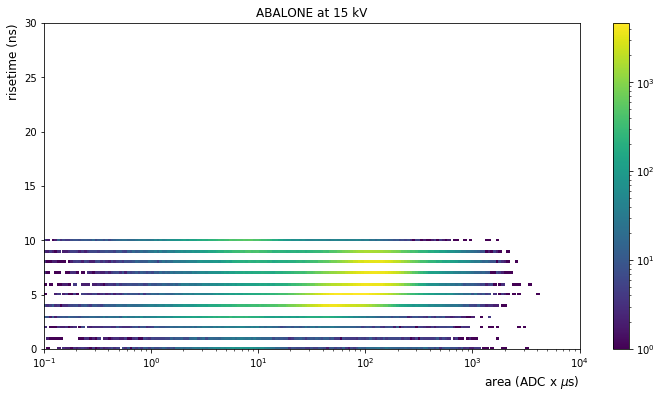

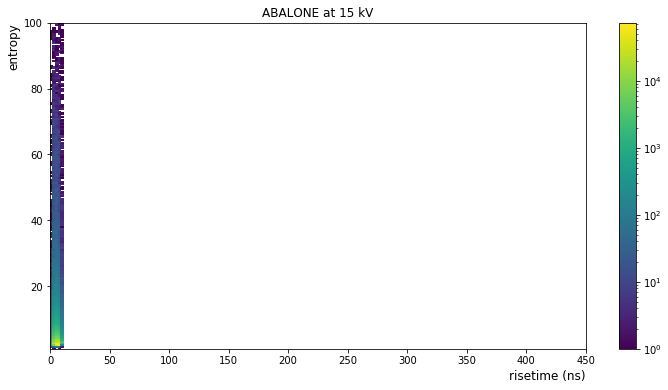

In [3]:
pau.plot_data(data=dataLED,fvolt=15,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_03_T1106_ABALONE_15kV_SiPM2_32V_LED400V.dat Number of events 595349.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 11708 waveform samples 1024
Events rejected by areadown 11708 -> 1.9665775872639408 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 12 waveform samples 1024
Events rejected by risetime 12 -> 0.00201562444885269 %

n. events 78253 waveform samples 1024
Events rejected by max position 78253 -> 13.144054999672461 %

n. events 473765 waveform samples 1024
Events selected  473765 -> 79.57769308422455 %


<Figure size 864x432 with 0 Axes>

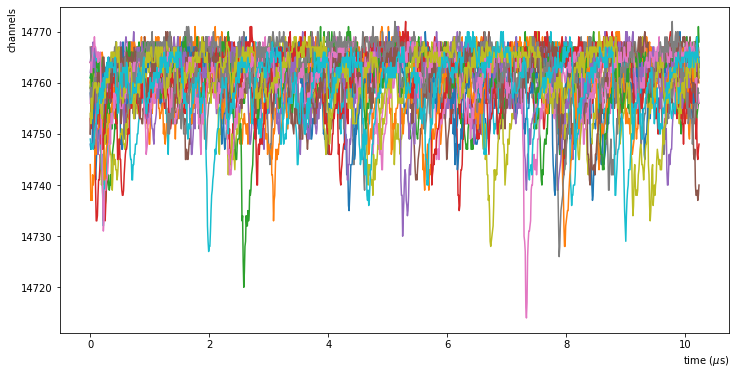

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

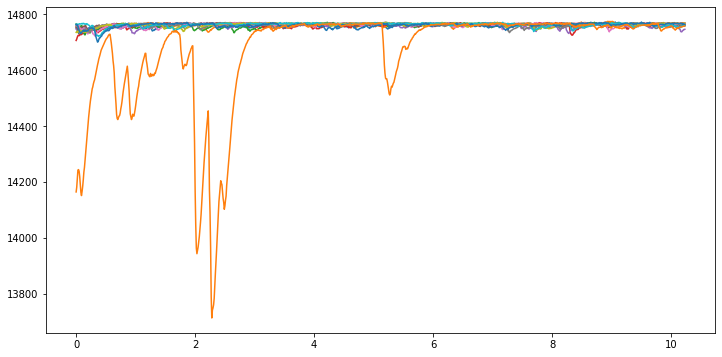

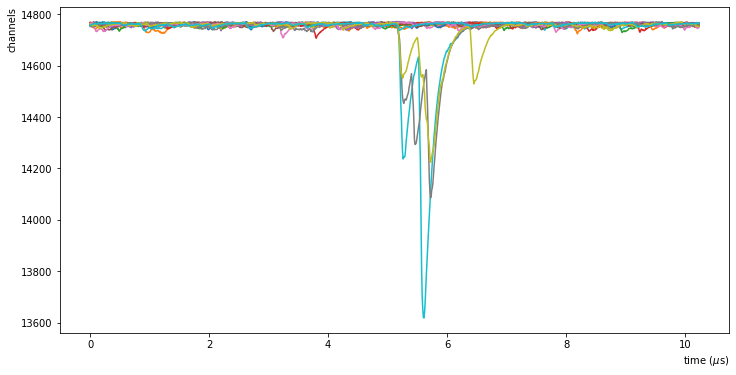

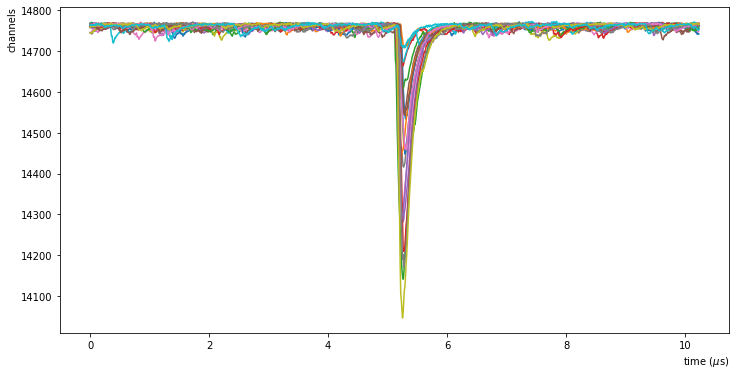

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,fvolt=15,entr_cut=200,
                                  max_cut=1,area_cut=(0,1e7), pos_cut=(500,550),rt_cut=0,events=20)

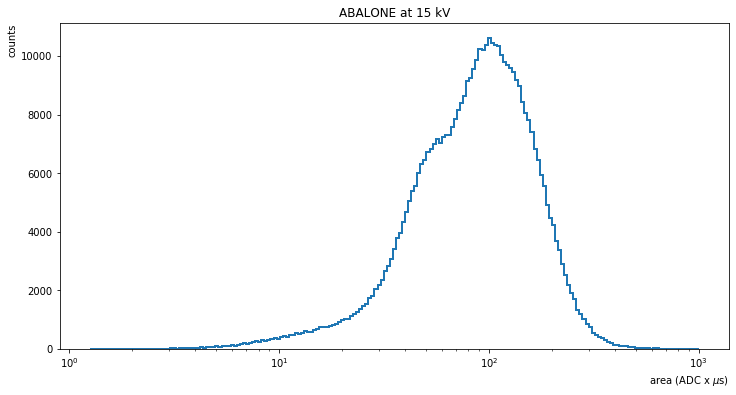

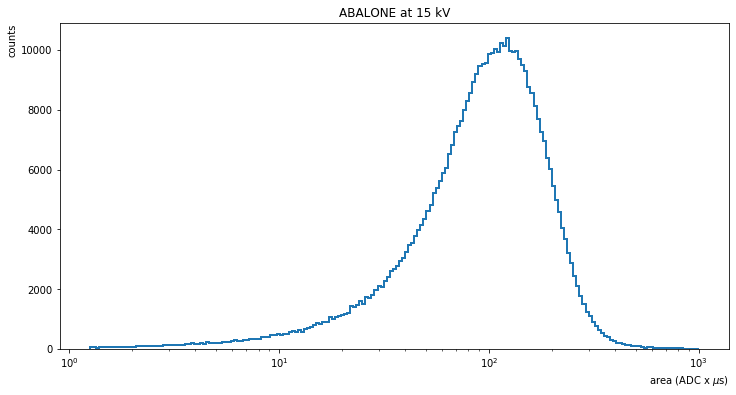

<Figure size 864x432 with 0 Axes>

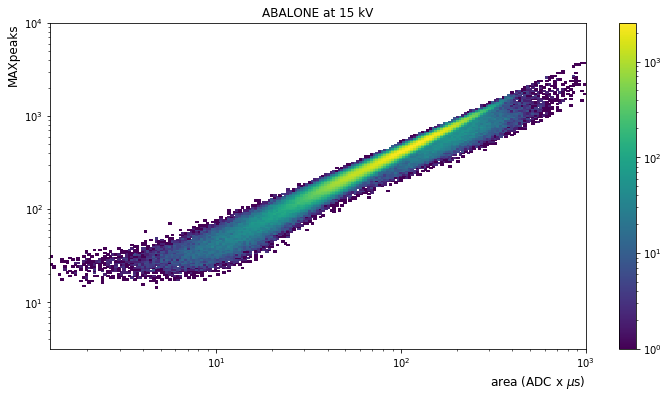

<Figure size 864x432 with 0 Axes>

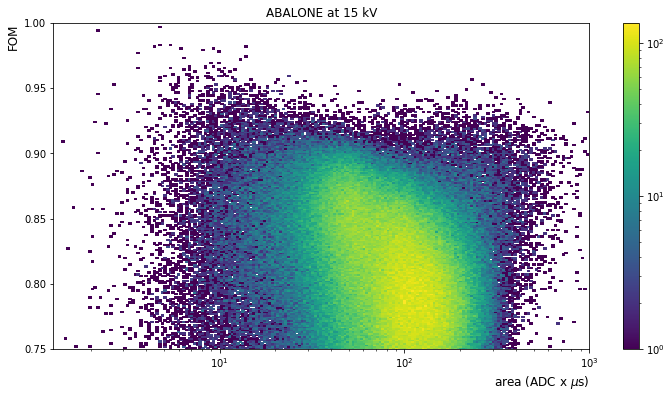

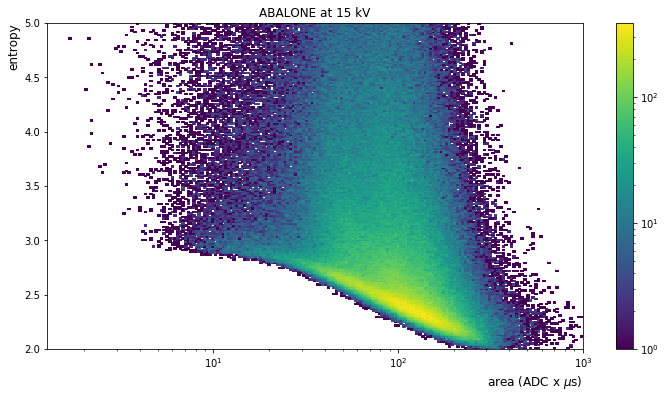

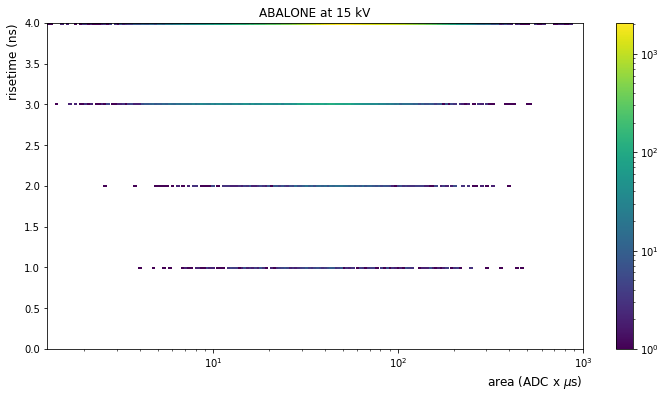

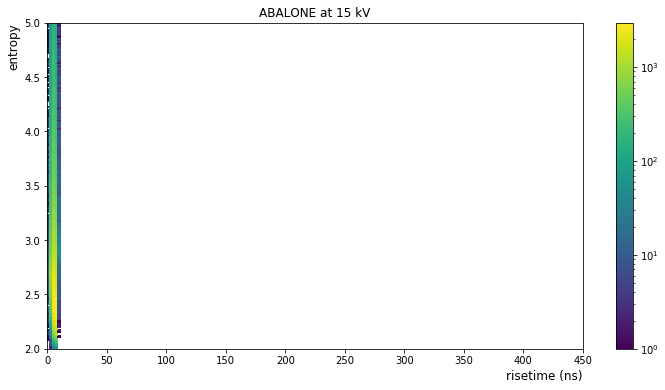

In [5]:
pau.plot_data(data=new_data,fvolt=15,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 71750 waveform samples 1024


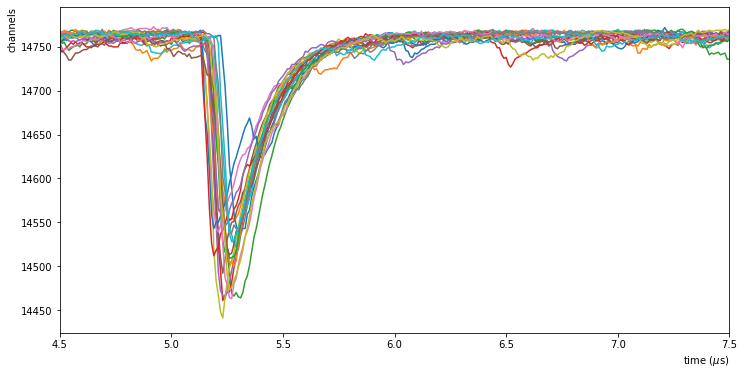

In [6]:
wf2 = new_wf[(new_data['area']>50)&(new_data['area']<70)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

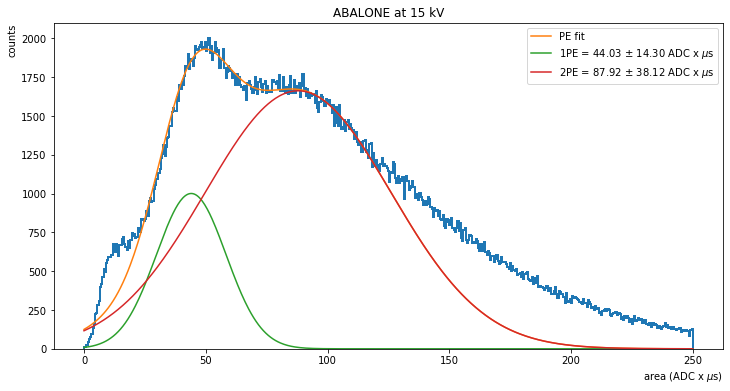

In [10]:
popt = pau.fit_pe_spectrum(new_data['area'],volts = 15,low=0, high=250, bins=500,fit_range=(20,120),dpe=1)

In [12]:
popt[1]/1.113

38.123021202926765

In [11]:
#peakint = np.load('processed_data/peakint_ABALONE_20kV_SiPM2_32V.npy')
peakint = pau.calculate_integrals( new_wf, nn = 0, volts = 15, sipmv = 32,ledv='4p0', plot = 0, save = 1)

Total events: 473765
event n. 0 area: 53.03, time to process: 0.01
event n. 1000 area: 79.65, time to process: 5.04
event n. 2000 area: 140.26, time to process: 10.10
event n. 3000 area: 64.00, time to process: 15.23
event n. 4000 area: 78.16, time to process: 20.26
event n. 5000 area: 48.30, time to process: 25.35
event n. 6000 area: 93.99, time to process: 30.50
event n. 7000 area: 103.87, time to process: 35.62
event n. 8000 area: 63.45, time to process: 40.54
event n. 9000 area: 150.83, time to process: 45.69
event n. 10000 area: 30.96, time to process: 50.79
event n. 11000 area: 89.41, time to process: 55.78
event n. 12000 area: 34.87, time to process: 60.83
event n. 13000 area: 88.14, time to process: 65.94
event n. 14000 area: 106.11, time to process: 71.09
event n. 15000 area: 38.74, time to process: 76.15
event n. 16000 area: 35.08, time to process: 81.27
event n. 17000 area: 69.81, time to process: 86.38
event n. 18000 area: 87.79, time to process: 91.44
event n. 19000 area: 

event n. 156000 area: 153.67, time to process: 794.04
event n. 157000 area: 77.00, time to process: 799.08
event n. 158000 area: 58.75, time to process: 804.12
event n. 159000 area: 63.34, time to process: 809.15
event n. 160000 area: 203.20, time to process: 814.23
event n. 161000 area: 43.12, time to process: 819.35
event n. 162000 area: 114.27, time to process: 824.55
event n. 163000 area: 232.83, time to process: 829.75
event n. 164000 area: 35.43, time to process: 834.84
event n. 165000 area: 8.11, time to process: 839.81
event n. 166000 area: 39.90, time to process: 844.87
event n. 167000 area: 51.76, time to process: 849.94
event n. 168000 area: 70.02, time to process: 855.04
event n. 169000 area: 122.61, time to process: 860.24
event n. 170000 area: 95.94, time to process: 865.35
event n. 171000 area: 54.24, time to process: 870.54
event n. 172000 area: 30.84, time to process: 875.56
event n. 173000 area: 51.51, time to process: 880.61
event n. 174000 area: 127.20, time to proc

event n. 308000 area: 43.67, time to process: 1568.55
event n. 309000 area: 21.00, time to process: 1573.52
event n. 310000 area: 71.21, time to process: 1578.56
event n. 311000 area: 37.02, time to process: 1583.61
event n. 312000 area: 23.14, time to process: 1588.55
event n. 313000 area: 108.54, time to process: 1593.68
event n. 314000 area: 64.13, time to process: 1598.70
event n. 315000 area: 104.29, time to process: 1603.81
event n. 316000 area: 94.89, time to process: 1608.87
event n. 317000 area: 146.38, time to process: 1614.00
event n. 318000 area: 138.63, time to process: 1619.10
event n. 319000 area: 79.21, time to process: 1624.20
event n. 320000 area: 72.44, time to process: 1629.24
event n. 321000 area: 40.27, time to process: 1634.33
event n. 322000 area: 17.37, time to process: 1639.40
event n. 323000 area: 69.86, time to process: 1644.52
event n. 324000 area: 90.48, time to process: 1649.51
event n. 325000 area: 36.49, time to process: 1654.56
event n. 326000 area: 13

event n. 459000 area: 14.13, time to process: 2335.60
event n. 460000 area: 134.59, time to process: 2340.71
event n. 461000 area: 143.35, time to process: 2345.72
event n. 462000 area: 81.72, time to process: 2350.77
event n. 463000 area: 37.84, time to process: 2355.80
event n. 464000 area: 66.55, time to process: 2360.80
event n. 465000 area: 9.63, time to process: 2365.85
event n. 466000 area: 97.31, time to process: 2370.99
event n. 467000 area: 234.59, time to process: 2376.01
event n. 468000 area: 93.00, time to process: 2381.05
event n. 469000 area: 53.38, time to process: 2386.07
event n. 470000 area: 68.04, time to process: 2391.11
event n. 471000 area: 96.74, time to process: 2396.17
event n. 472000 area: 105.15, time to process: 2401.31
event n. 473000 area: 33.93, time to process: 2406.36


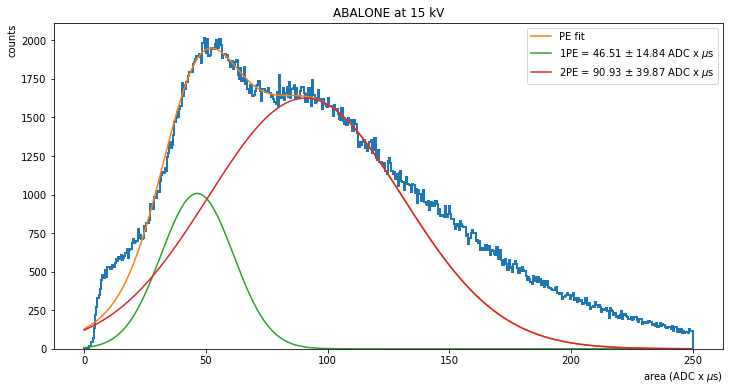

In [12]:
popt = pau.fit_pe_spectrum(peakint,volts = 15,low=0, high=250, bins=500,fit_range=(20,120),dpe=1)

In [11]:
popt[1]/1.113

50.23418376329527